In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/THU-KEG/MOOCCubeX.git

Cloning into 'MOOCCubeX'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 61 (delta 4), reused 0 (delta 0), pack-reused 53 (from 1)
Receiving objects: 100% (61/61), 1.29 MiB | 2.94 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [ ]:
root_folder = "/content/mooc/raw"

In [ ]:
!wget http://lfs.aminer.cn/misc/moocdata/data/MOOCCube.zip
!unzip MOOCCube.zip -d /content/mooc/

--2024-12-09 08:01:58--  http://lfs.aminer.cn/misc/moocdata/data/MOOCCube.zip
Resolving lfs.aminer.cn (lfs.aminer.cn)... 159.27.2.14
Connecting to lfs.aminer.cn (lfs.aminer.cn)|159.27.2.14|:80... connected.
HTTP request sent, awaiting response... 200 OK
Could not parse String-Transport-Security header
Length: 1090812978 (1.0G) [application/zip]
Saving to: ‘MOOCCube.zip’

MOOCCube.zip        100%[===================>]   1.02G  19.8MB/s    in 56s     

2024-12-09 08:02:55 (18.5 MB/s) - ‘MOOCCube.zip’ saved [1090812978/1090812978]

Archive:  MOOCCube.zip
   creating: /content/mooc/MOOCCube/
   creating: /content/mooc/MOOCCube/entities/
  inflating: /content/mooc/MOOCCube/entities/course.json  
  inflating: /content/mooc/MOOCCube/entities/paper.json  
  inflating: /content/mooc/MOOCCube/entities/school.json  
  inflating: /content/mooc/MOOCCube/entities/user.json  
  inflating: /content/mooc/MOOCCube/entities/video.json  
  inflating: /content/mooc/MOOCCube/entities/teacher.json  
  inflat

In [ ]:
import json
import os
import pandas as pd
import csv
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# đọc các relationship của các node
# gồm nhiều hàng, mỗi hàng gồm giá trị cách nhau bởi tab (\t)
# user_id1  teacher_id1
def read_json_relation(file_path, save_path, node_title):
  with open(file_path, 'r', encoding='utf-8') as infile, open(save_path, 'w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)

    writer.writerow(node_title)
    for index, line in enumerate(infile): # lặp qua từng hàng
        try:
          data = line.strip().split('\t') # tách 2 giá trị ra
          writer.writerow(data) # thêm hàng vào csv (outfile)
        except:
          print(data)
  return pd.read_csv(save_path)

# đọc các thực thể (đỉnh của graph)
# gồm nhiều hàng mỗi hàng json {}
def get_data_csv(file_path, save_path, limit = -1):
  with open(file_path, 'r', encoding='utf-8') as infile, open(save_path, 'w', newline='', encoding='utf-8') as outfile:

    writer = csv.writer(outfile)
    for index, line in enumerate(infile): # đọc từng hàng của file
        try:
          data = json.loads(line) # load json của hàng đó
          if index == 0:
            writer.writerow(data.keys()) # nếu là hàng đầu tên cột data.keys() -> lấy thuộc tính của json
          writer.writerow(data.values()) # lưu giá trị value -> csv (outfile)
          if index + 1 == limit:
            break
        except:
          print(data)
  return pd.read_csv(save_path)


In [ ]:
user = get_data_csv("/content/mooc/MOOCCube/entities/user.json", "/content/user.csv")

print(user.head())

           id name                                       course_order  \
0   U_7001215  李喜锋  ['C_course-v1:TsinghuaX+00740043_2x_2015_T2+sp...   
1  U_10402446  五元香  ['C_course-v1:TsinghuaX+00510888X+2019_T1', 'C...   
2  U_10359065   魏珊  ['C_course-v1:TsinghuaX+00612642X+sp', 'C_cour...   
3   U_7423998  郭海滨  ['C_course-v1:TsinghuaX+30240184_2X+sp', 'C_co...   
4    U_545306  李其艳  ['C_course-v1:TsinghuaX+20430064_2X+sp', 'C_co...   

                                         enroll_time  
0  ['2017-05-01 11:07:53', '2017-05-17 10:07:17',...  
1     ['2019-06-14 08:50:04', '2019-01-04 20:36:07']  
2     ['2019-01-18 21:19:56', '2019-01-14 21:54:54']  
3  ['2017-08-16 10:38:11', '2018-07-01 18:24:24',...  
4  ['2018-09-05 15:40:40', '2019-02-28 10:08:49',...  


In [ ]:
course = get_data_csv("/content/mooc/MOOCCube/entities/course.json", "/content/course.csv")

print(course.head())

                                              id                   name  \
0           C_course-v1:McGillX+ATOC185x+2015_T1             自然灾害（自主模式）   
1      C_course-v1:TsinghuaX+THESIS2015X+2015_T1  2015年清华大学研究生学位论文答辩（二）   
2  C_course-v1:TsinghuaX+THESIS2014_1X_tv+_2014_  2014年清华大学研究生学位论文答辩（一）   
3   C_course-v1:TsinghuaX+THESIS2015X_tv+2015_T1  2015年清华大学研究生学位论文答辩（一）   
4              C_course-v1:TsinghuaX+00690242+sp        文物精品与文化中国（自主模式）   

  prerequisites                                              about  \
0             无  <p>地球上没有一处地方不发生自然灾害。当我们以科学的眼光看待这些自然灾害的原因和本质时，我...   
1         无先修要求  <p>学位论文答辩环节是研究生培养的重要环节，为了充分发挥该环节的育人作用，搭建学术交流的平...   
2         无先修要求  <p>学位论文答辩环节是研究生培养的重要环节，为了充分发挥该环节的育人作用，搭建学术交流的平...   
3         无先修要求  <p>学位论文答辩环节是研究生培养的重要环节，为了充分发挥该环节的育人作用，搭建学术交流的平...   
4             无  <p>中国考古学是以往100年中发展最为迅速的领域之一，大批珍贵文物的出土，不断刷新人们对文...   

                                         core_id  \
0           C_course-v1:McGillX+ATOC185x+2015_T1   
1      C_course-v1:Tsing

In [ ]:
school = get_data_csv("/content/mooc/MOOCCube/entities/school.json", "/content/school.csv")

print(school.head())

        id    name                                              about
0    S_BNU  北京师范大学  北京师范大学（Beijing Normal University）简称“北师大”，由中华人民...
1    S_UQx   昆士兰大学  昆士兰大学（The University of Queensland），简称昆大，世界50强...
2  S_UESTC  电子科技大学  电子科技大学（University of Electronic Science and Te...
3    S_BIT  北京理工大学  北京理工大学（Beijing Institute of Technology）简称北理工，由...
4    S_JNU    暨南大学  暨南大学（Jinan University），简称“”暨大（JNU），位于广东省广州市，是中...


In [ ]:
teacher = get_data_csv("/content/mooc/MOOCCube/entities/teacher.json", "/content/teacher.csv")

print(teacher.head())

      id name                                              about
0  T_方维奇  方维奇  方维奇，男，陕西工业职业技术学院教师，讲师。主持并参与院级科研项目3项，发表教科研论文13篇...
1  T_范茂魁  范茂魁  范茂魁（1979-）男，教授，硕士学位，教龄17年，主要从事《消防燃烧学》、《化学基础》、《...
2  T_连小珉  连小珉  连小珉，男，1955年生于重庆。清华大学教授，清华大学机械工程学位分委会副主席。中国汽车工程...
3  T_张德顺  张德顺  张德顺,1964年生,同济大学建筑与城市规划学院高密度人居环境生态与节能 教育部重点实验室教...
4   T_王红   王红  王红，硕士，教授，硕士生导师。长期从事寄生虫学教学 与科研工作。教学方面，独立系统地担任了本...


In [ ]:
user_course = read_json_relation("/content/mooc/MOOCCube/relations/user-course.json", "/content/user-course.csv", ["user","course"])
# user_id course_id
print(user_course.head())

        user                                        course
0  U_7001215  C_course-v1:TsinghuaX+00740043_2x_2015_T2+sp
1  U_7001215             C_course-v1:TsinghuaX+30240184+sp
2  U_7001215    C_course-v1:TsinghuaX+00740043X_2015_T2+sp
3  U_7001215     C_course-v1:TsinghuaX+10421094X_2015_2+sp
4  U_7001215          C_course-v1:TsinghuaX+30240184_2X+sp


In [ ]:
teacher_course = read_json_relation("/content/mooc/MOOCCube/relations/teacher-course.json", "/content/teacher-course.csv", ["teacher","course"])

print(teacher_course.head()) # pandas show các giá trị đầu tiên trong dataframe

  teacher                                     course
0   T_方维奇            C_course-v1:SPI+20170828001x+sp
1   T_方维奇      C_course-v1:SXPI+20170828001x+2019_T1
2   T_范茂魁      C_course-v1:PSFFC+2018102405X+2018_T2
3   T_连小珉  C_course-v1:TsinghuaX+70150104_2X+2019_T1
4   T_连小珉    C_course-v1:TsinghuaX+70150104X+2019_T1


In [ ]:
school_teacher = read_json_relation("/content/mooc/MOOCCube/relations/school-teacher.json", "/content/school-teacher.csv", ["school","teacher"])

print(school_teacher.head())

  school teacher
0  S_BNU    T_张燕
1  S_BNU   T_陈蒨蒨
2  S_BNU   T_王文周
3  S_BNU   T_马俊伟
4  S_BNU   T_成卫东


In [ ]:
print('================================')
print(user.info())
print('================================')
print(school.info())
print('================================')
print(course.info())
print('================================')
print(teacher.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199199 entries, 0 to 199198
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            199199 non-null  object
 1   name          199199 non-null  object
 2   course_order  199199 non-null  object
 3   enroll_time   199199 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      208 non-null    object
 1   name    194 non-null    object
 2   about   194 non-null    object
dtypes: object(3)
memory usage: 5.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             706 non-null    object
 1   name           706 n

In [ ]:
# Kiểm tra các giá trị thiếu
print(user.isnull().sum())
print('================================')
print(school.isnull().sum())
print('================================')
print(course.isnull().sum())
print('================================')
print(teacher.isnull().sum())
print('================================')

id              0
name            0
course_order    0
enroll_time     0
dtype: int64
id        0
name     14
about    14
dtype: int64
id               0
name             0
prerequisites    4
about            0
core_id          0
video_order      0
display_name     0
chapter          0
dtype: int64
id       0
name     0
about    0
dtype: int64


In [ ]:
print(user.head())

           id name                                       course_order  \
0   U_7001215  李喜锋  ['C_course-v1:TsinghuaX+00740043_2x_2015_T2+sp...   
1  U_10402446  五元香  ['C_course-v1:TsinghuaX+00510888X+2019_T1', 'C...   
2  U_10359065   魏珊  ['C_course-v1:TsinghuaX+00612642X+sp', 'C_cour...   
3   U_7423998  郭海滨  ['C_course-v1:TsinghuaX+30240184_2X+sp', 'C_co...   
4    U_545306  李其艳  ['C_course-v1:TsinghuaX+20430064_2X+sp', 'C_co...   

                                         enroll_time  course_count  
0  ['2017-05-01 11:07:53', '2017-05-17 10:07:17',...           216  
1     ['2019-06-14 08:50:04', '2019-01-04 20:36:07']            81  
2     ['2019-01-18 21:19:56', '2019-01-14 21:54:54']            76  
3  ['2017-08-16 10:38:11', '2018-07-01 18:24:24',...           267  
4  ['2018-09-05 15:40:40', '2019-02-28 10:08:49',...           407  


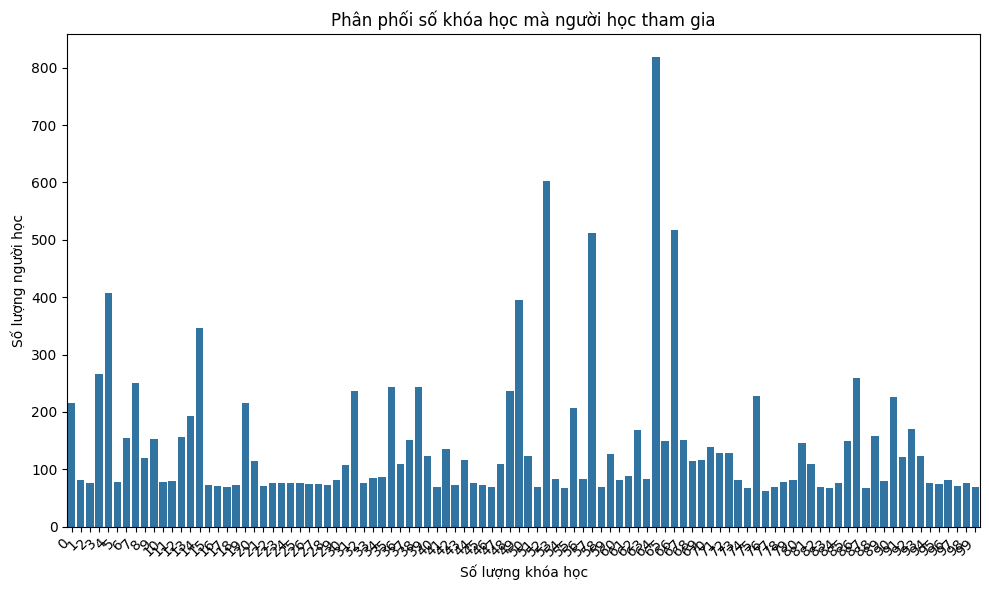

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

user_counts = user['course_order'].apply(len)

plt.figure(figsize=(10, 6))
sns.barplot(x=user_counts.index[:100], y=user_counts.values[:100])
plt.title('Phân phối số khóa học mà người học tham gia')
plt.xlabel('Số lượng khóa học')
plt.ylabel('Số lượng người học')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

user_counts = user['course_order'].apply(len)

plt.figure(figsize=(10, 6))
sns.barplot(x=user_counts.index[:100], y=user_counts.values[:100])
plt.title('Phân phối số khóa học mà người học tham gia')
plt.xlabel('Số lượng khóa học')
plt.ylabel('Số lượng người học')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

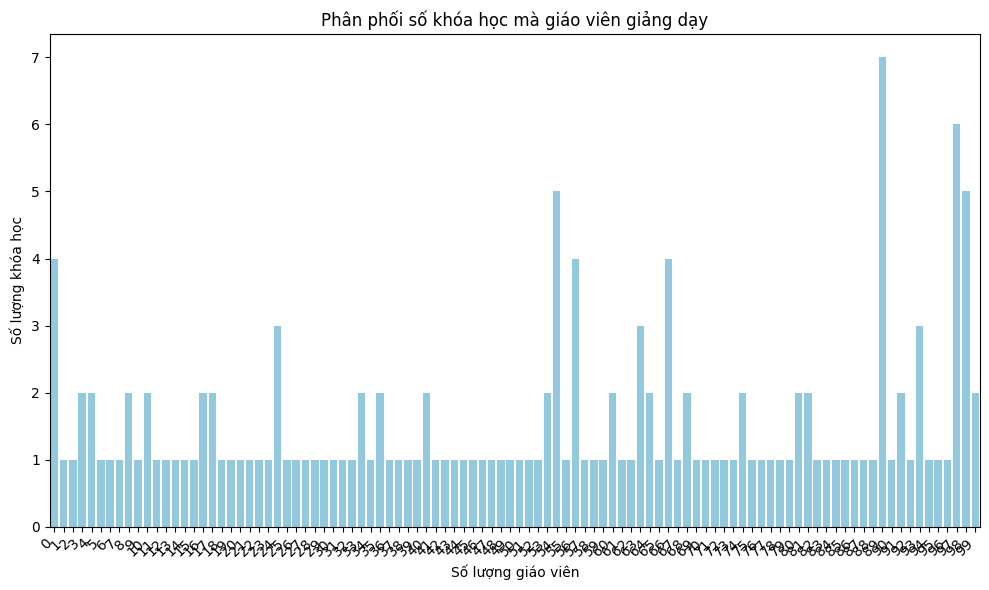

In [ ]:
teacher_course_count = teacher_course.groupby('teacher').count().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x=teacher_course_count.index[0:100], y=teacher_course_count['course'][0:100], color='skyblue')

plt.title('Phân phối số khóa học mà giáo viên giảng dạy')
plt.xlabel('Số lượng giáo viên')
plt.ylabel('Số lượng khóa học')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()